In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Ridge


data = pd.read_csv("auto.csv",delimiter=',')
df=data.replace('?', np.NaN)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


In [3]:
df['horsepower']=df.iloc[:,3].astype(float)

In [4]:
df.groupby('cylinders').median()

,mpg,displacement,horsepower,weight,acceleration,model year,origin
cylinders,,,,,,,
3,20.25,70.0,98.5,2375.0,13.5,75.0,3.0
4,28.25,105.0,78.0,2232.0,16.2,78.0,2.0
5,25.40,131.0,77.0,2950.0,19.9,79.0,2.0
6,19.00,228.0,100.0,3201.5,16.1,76.0,1.0
8,14.00,350.0,150.0,4140.5,13.0,73.0,1.0


In [5]:
df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
a=df.groupby('cylinders')['horsepower'].count()

df["horsepower"] = df.groupby("cylinders").transform(lambda x: x.fillna(x.median()))
a

cylinders
3      4
4    199
5      3
6     83
8    102
Name: horsepower, dtype: int64

In [7]:
b=df.groupby('cylinders')['horsepower'].count()

In [8]:
b-a

cylinders
3    0
4    5
5    0
6    1
8    0
Name: horsepower, dtype: int64

In [9]:

len(df["car name"].unique().tolist())
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,15.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,18.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,16.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,17.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,15.0,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,14.0,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,14.0,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,14.0,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,15.0,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,15.0,3563,10.0,70,1,dodge challenger se


In [10]:
df.drop('car name',axis=1,inplace=True)

target=df.iloc[:,df.columns =="mpg"]
data=df.iloc[:,df.columns !="mpg"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:

lreg = LinearRegression()
lreg.fit(X_train, y_train)
train_score=lreg.score(X_train,y_train)
test_score=lreg.score(X_test,y_test)

print('Train score=',train_score,'Test score=',test_score)
lreg.intercept_

Train score= 1.0 Test score= 1.0


array([23.55824916])

In [13]:
from  sklearn.linear_model import Ridge
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [14]:
print(train_score_list)
print(test_score_list)

[0.999999993627155, 0.9999993669087103, 0.9999405272927882, 0.9962075185087165, 0.937459956883174]
[0.9999999931031548, 0.9999993159122886, 0.9999366067994118, 0.9961968098947939, 0.9419521851252735]


In [15]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


Text(0.5, 0, '$\\alpha$')

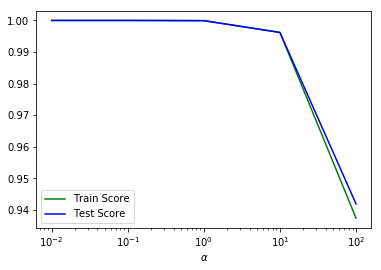

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [17]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0.5, 0, '$\\alpha$')

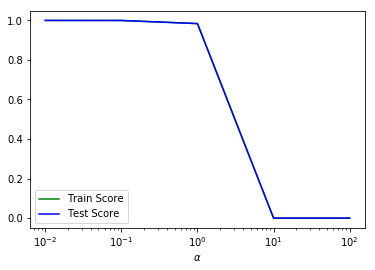

In [115]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [114]:
%matplotlib inline
train_score_array = []
test_score_array = []

X_train_new=X_train['horsepower']
X_test_new=X_test['horsepower']
X_train_new=X_train_new.reshape(-1,1)
X_test_new=X_test_new.reshape(-1,1)
n_neighbors=[1,5,10,20]
for k in n_neighbors:
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_new, y_train)
    train_score_array.append(knn_reg.score(X_train_new, y_train))
    test_score_array.append(knn_reg.score(X_test_new, y_test))

x_axis = n_neighbors
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

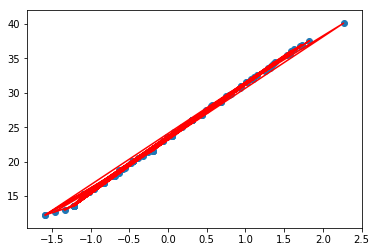

In [113]:

y_predict = knn_reg.predict(X_test_new)

plt.plot(X_test_new, y_predict, c = 'r')
plt.scatter(X_test_new, y_predict)

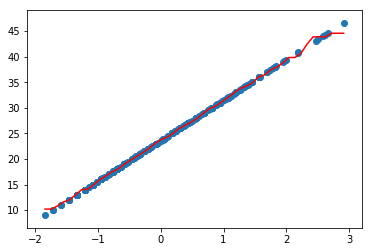

In [105]:
#CRIM and AGE
X_b = X_train[:,2].reshape(-1,1)
y_b = y_train[:]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

In [102]:
X_train[:,2]

array([0.29787234, 0.63297872, 0.3537234 , 0.37234043, 0.74468085,
       0.29787234, 0.30851064, 0.2393617 , 0.07978723, 0.60638298,
       0.42553191, 0.22606383, 0.18617021, 0.35638298, 0.50531915,
       0.43882979, 0.48404255, 0.13297872, 0.22606383, 0.30585106,
       0.17287234, 0.42553191, 0.53191489, 0.45212766, 0.27659574,
       0.18617021, 0.69148936, 0.71808511, 0.62234043, 0.93085106,
       0.05319149, 0.75265957, 0.65159574, 0.45212766, 0.77393617,
       0.34574468, 0.4787234 , 0.4787234 , 0.53191489, 0.76329787,
       0.42553191, 0.15957447, 0.58510638, 0.07978723, 0.53191489,
       0.42553191, 0.13297872, 0.53191489, 0.55851064, 0.15957447,
       0.22606383, 0.31914894, 0.10638298, 0.10638298, 0.44680851,
       0.26595745, 0.2393617 , 0.37234043, 0.46276596, 0.18617021,
       0.18617021, 0.74468085, 0.21276596, 0.19946809, 0.18617021,
       0.13297872, 0.10638298, 0.37234043, 0.34574468, 0.55585106,
       0.34574468, 0.24468085, 0.29255319, 0.31914894, 0.26595